### Advanced Machine Learning

# Home Exercise #1

Assignment Due: 21/03/21 23:59

Jonathan Schler


In [1]:
student1Name="Matan Mizrachi" # student1 name here
student1ID="207299363" # student1 ID here


student2Name="Ron Yosef" # student2 name here
student2ID="" # student2 ID here


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
plt.style.use('seaborn')
%matplotlib inline
# add more imports as needed

## Task 1 Regression on Ames Housing Dataset (60 Points)

You can load the Ames housing dataset from <br>
http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls <br>
You can find a description of the variables here: <br>
http://jse.amstat.org/v19n3/decock/DataDocumentation.txt <br>
Take note that for categorical variables, NA here does not mean a missing value, but should be treated as a separate category.

In [2]:
df = pd.read_excel("AmesHousing.xls")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Question 1.1
Visualize the univariate distribution of each continuous attribute, and the distribution of the target. Make sure you skip the string\categorial columns (you can do it using call to `select_dtypes(exclude=['object'])`).

Do you notice anything? Is there something that might require special treatment?

In [3]:
to_plot = df.select_dtypes(exclude=['object']).copy()
to_plot.drop(columns=['Order', 'PID', 'MS SubClass'], inplace=True)
cols = to_plot.columns.to_list()
cols.remove('SalePrice')

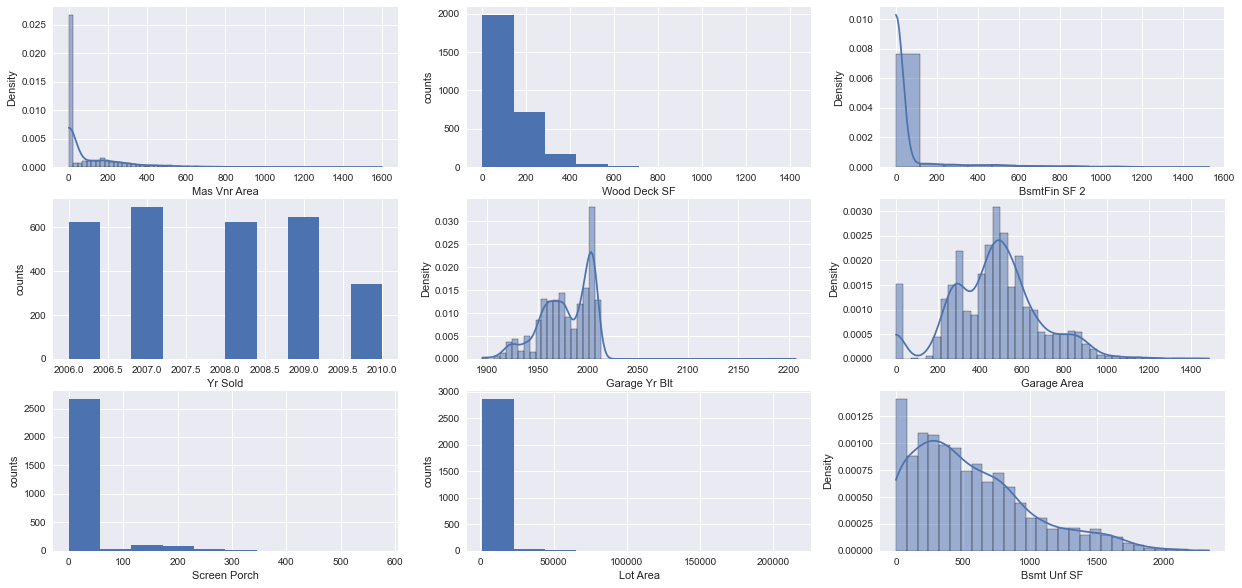

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(21,10))
_c = random.sample(cols, 9)
for i, col in enumerate(_c):
    cols.remove(col)
    if to_plot[col].dtype == 'int64':
        axes[i//3,i%3].hist(to_plot.loc[to_plot[col].isna() == False,col].to_numpy())
        axes[i//3,i%3].set_xlabel(col)
        axes[i//3,i%3].set_ylabel('counts')
    else:
        sns.histplot(data=to_plot, x=col, discrete=False, ax=axes[i//3,i%3], kde=True, stat='density')

plt.show()

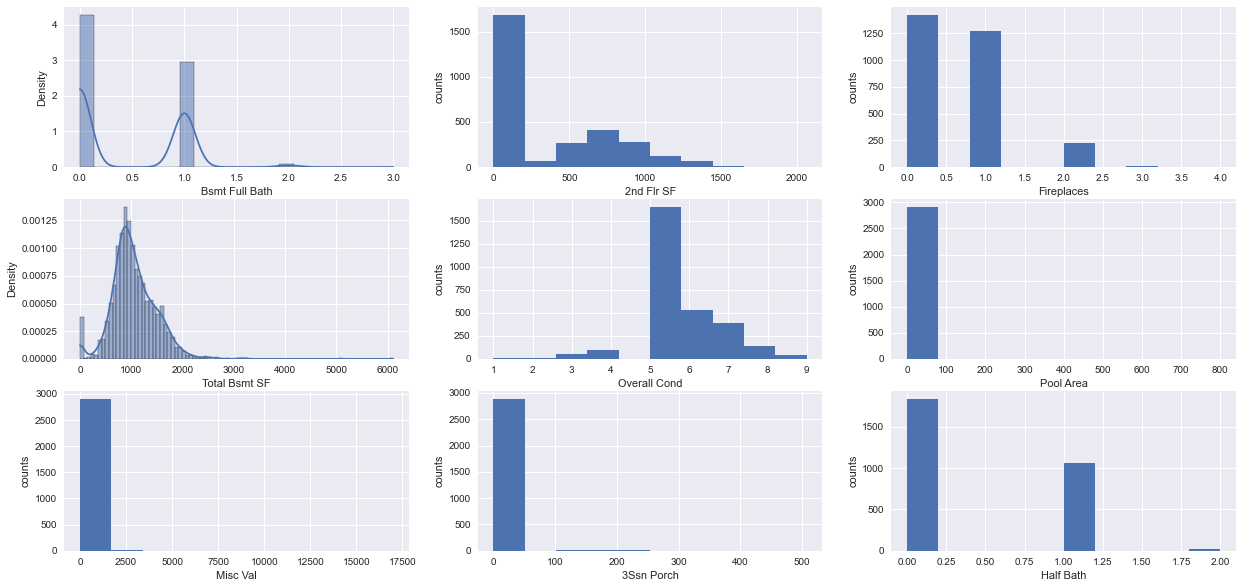

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(21,10))
_c = random.sample(cols, 9)
for i, col in enumerate(_c):
    cols.remove(col)
    if to_plot[col].dtype == 'int64':
        axes[i//3,i%3].hist(to_plot.loc[to_plot[col].isna() == False,col].to_numpy())
        axes[i//3,i%3].set_xlabel(col)
        axes[i//3,i%3].set_ylabel('counts')
    else:
        sns.histplot(data=to_plot, x=col, discrete=False, ax=axes[i//3,i%3], kde=True, stat='density')

plt.show()


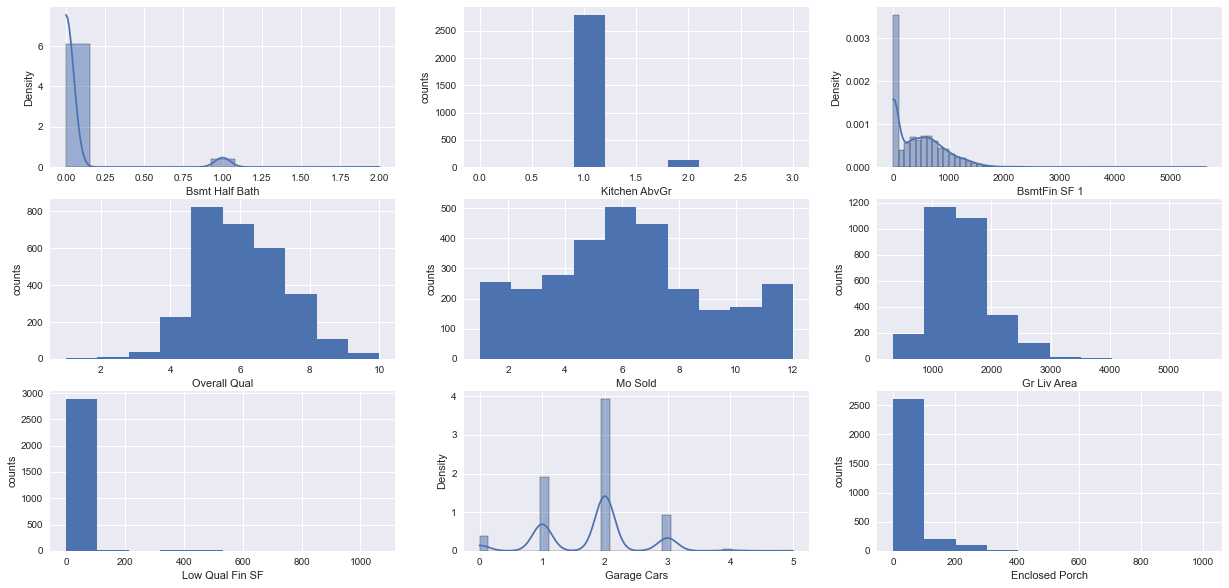

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(21,10))
_c = random.sample(cols, 9)
for i, col in enumerate(_c):
    cols.remove(col)
    if to_plot[col].dtype == 'int64':
        axes[i//3,i%3].hist(to_plot.loc[to_plot[col].isna() == False,col].to_numpy())
        axes[i//3,i%3].set_xlabel(col)
        axes[i//3,i%3].set_ylabel('counts')
    else:
        sns.histplot(data=to_plot, x=col, discrete=False, ax=axes[i//3,i%3], kde=True, stat='density')

plt.show()

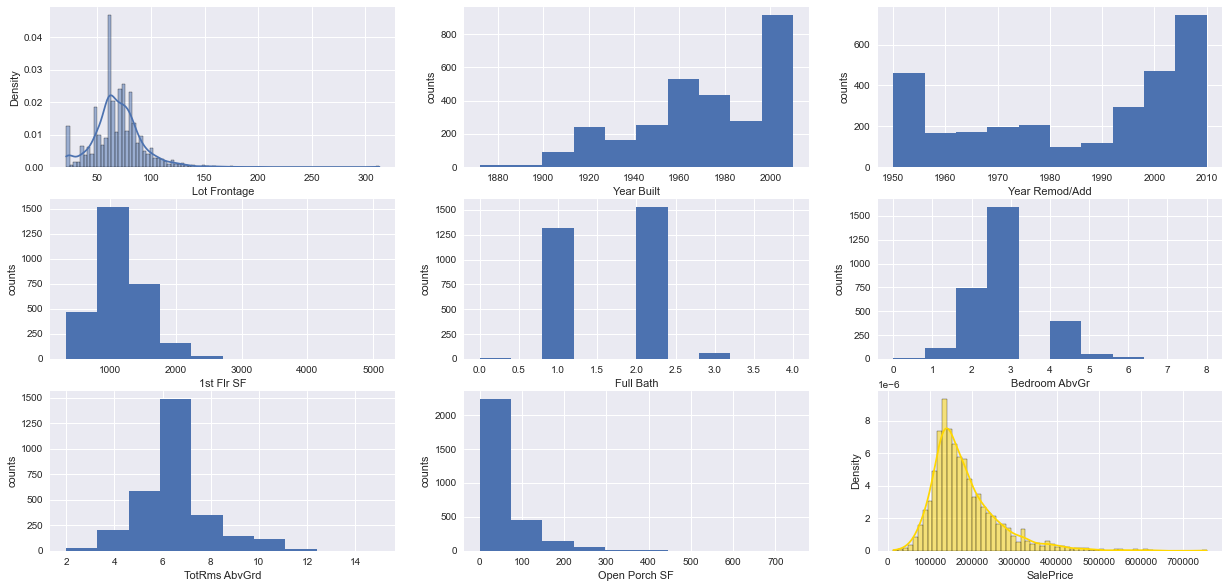

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(21,10))
for i, col in enumerate(cols):
    if to_plot[col].dtype == 'int64':
        axes[i//3,i%3].hist(to_plot.loc[to_plot[col].isna() == False,col].to_numpy())
        axes[i//3,i%3].set_xlabel(col)
        axes[i//3,i%3].set_ylabel('counts')
    else:
        sns.histplot(data=to_plot, x=col, discrete=False, ax=axes[i//3,i%3], kde=True, stat='density')

sns.histplot(data=df, x='SalePrice', discrete=False, ax=axes[2, 2], kde=True, stat='density', color='gold')
plt.show()

### Answer 1.1
1. Some of the "Continues" variables are, in fact, discrete. Moreover, we might actually would like to turn those into
categorical variables, since these doesn't hold much unique values. For an example, check out the 'Garage Cars' variable's
"density" plot.

2. Many of the variables are varying on large scales, so it is clear that we'd like to normalize them further ahead.

3. Some variables might require a special treatment for their outliers.

### Question 1.2
Visualize the dependency of the target on each continuous feature (2d scatter plot).

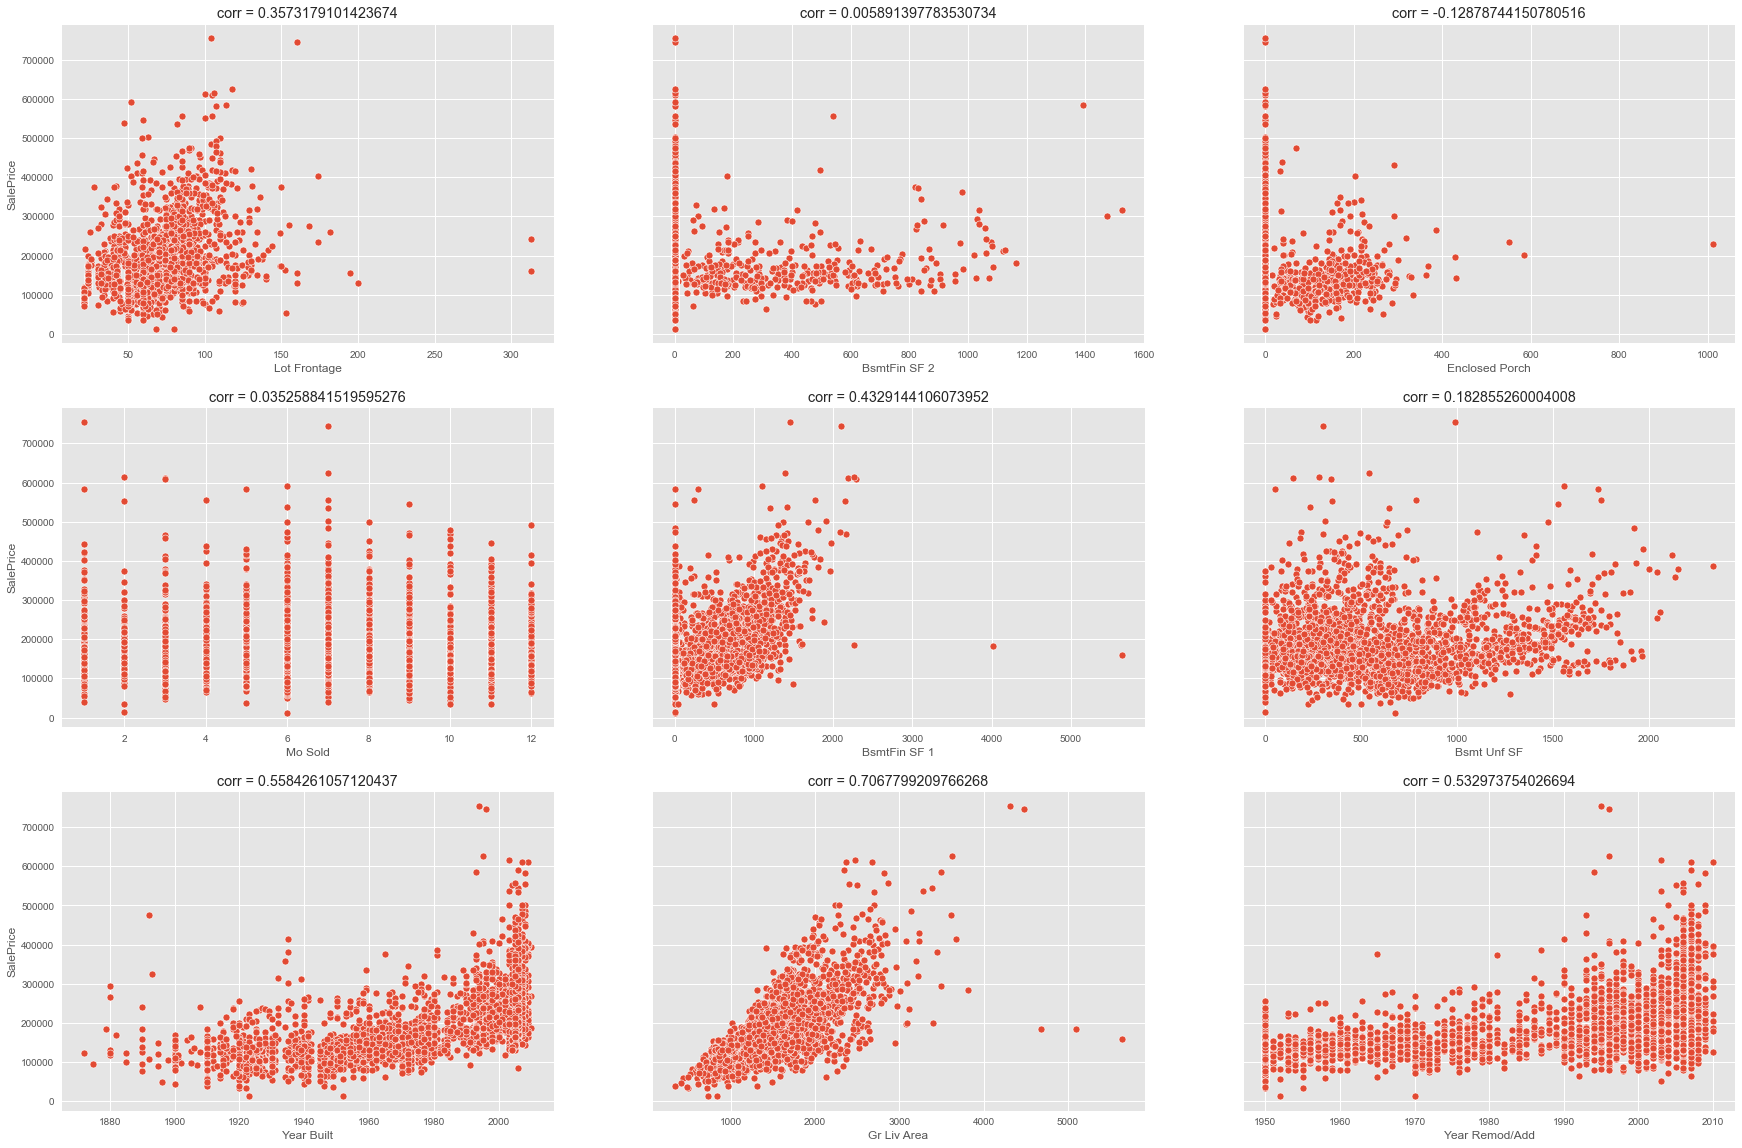

In [24]:
plt.style.use('ggplot')
corr = to_plot.corr()

cols = to_plot.columns.to_list()
cols.remove('SalePrice')
fig, axes = plt.subplots(3, 3, figsize=(30,20), sharey=True)
_c = random.sample(cols, 9)
for i, col in enumerate(_c):
    cols.remove(col)
    axes[i//3,i%3].set_title(f'corr = {corr.loc[col, "SalePrice"]}')
    sns.scatterplot(x=col, y="SalePrice", data=to_plot, ax=axes[i//3,i%3])

plt.show()

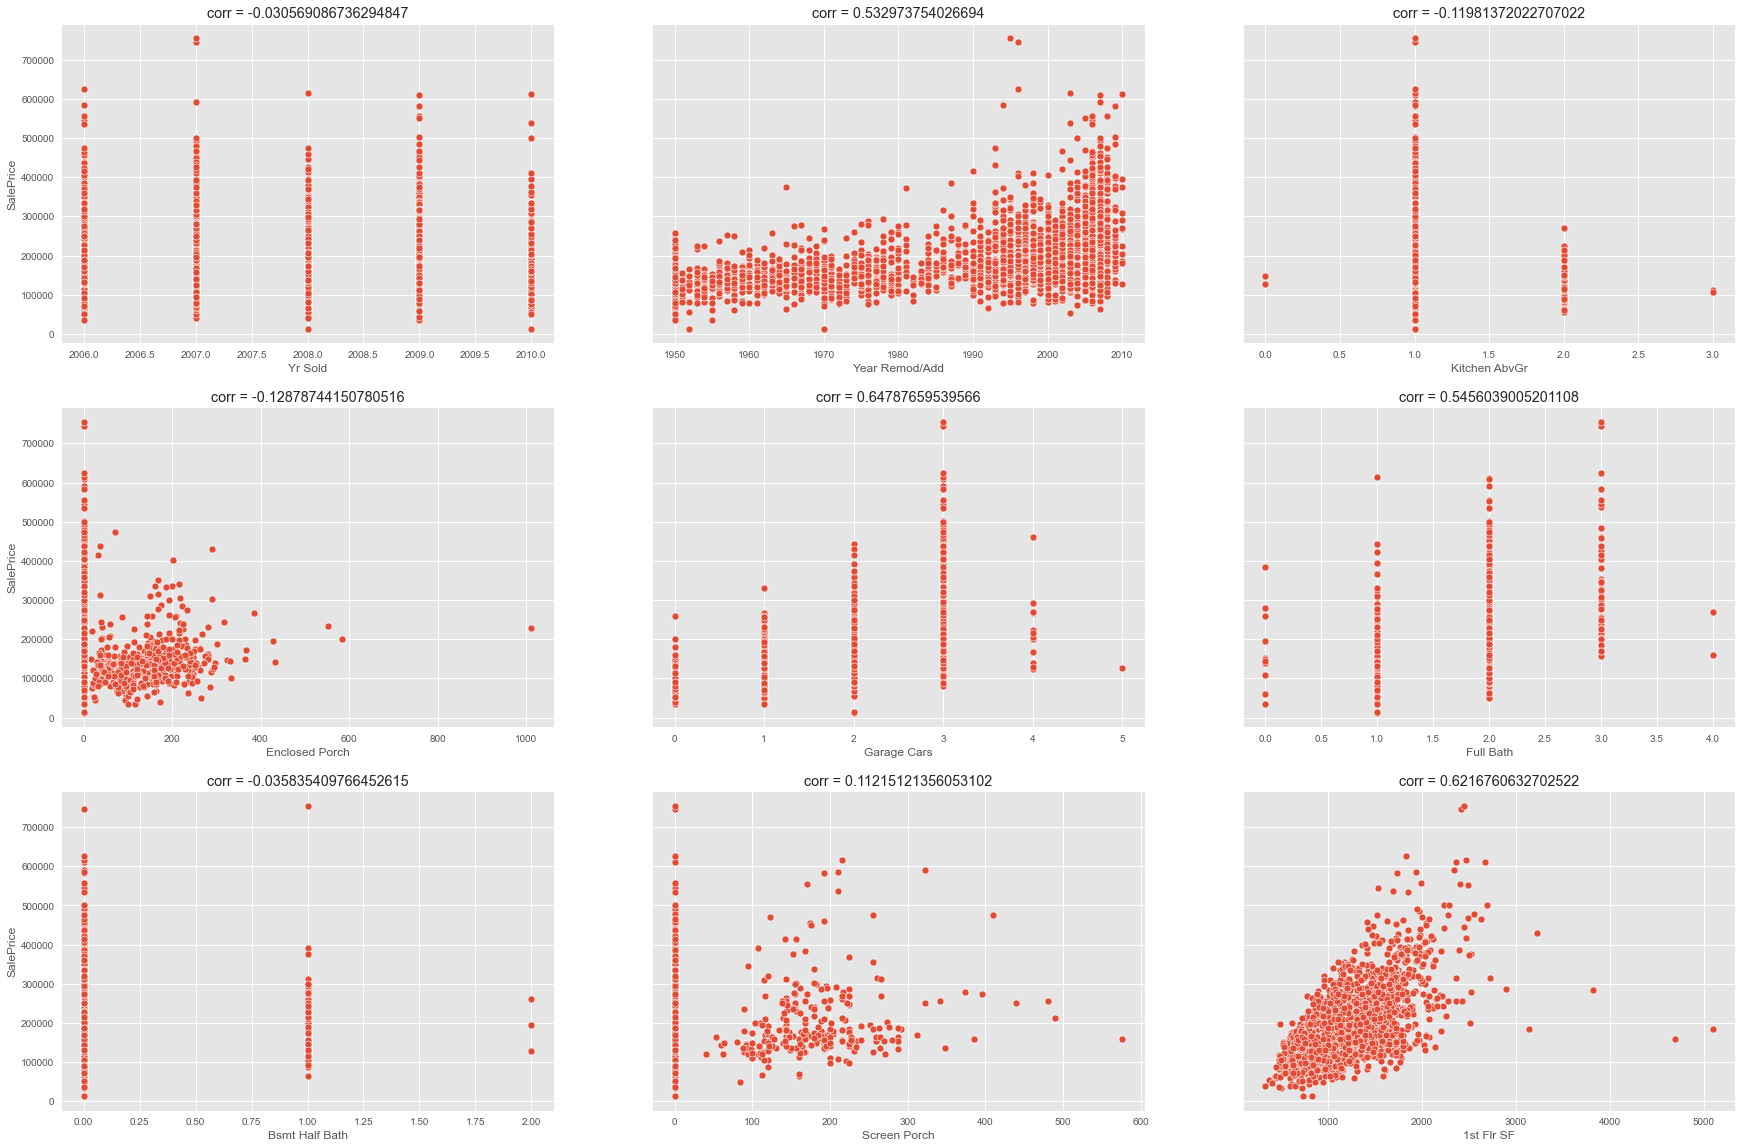

In [25]:
cols = to_plot.columns.to_list()
cols.remove('SalePrice')
fig, axes = plt.subplots(3, 3, figsize=(30,20), sharey=True)
_c = random.sample(cols, 9)
for i, col in enumerate(_c):
    cols.remove(col)
    axes[i//3,i%3].set_title(f'corr = {corr.loc[col, "SalePrice"]}')
    sns.scatterplot(x=col, y="SalePrice", data=to_plot, ax=axes[i//3,i%3])

plt.show()

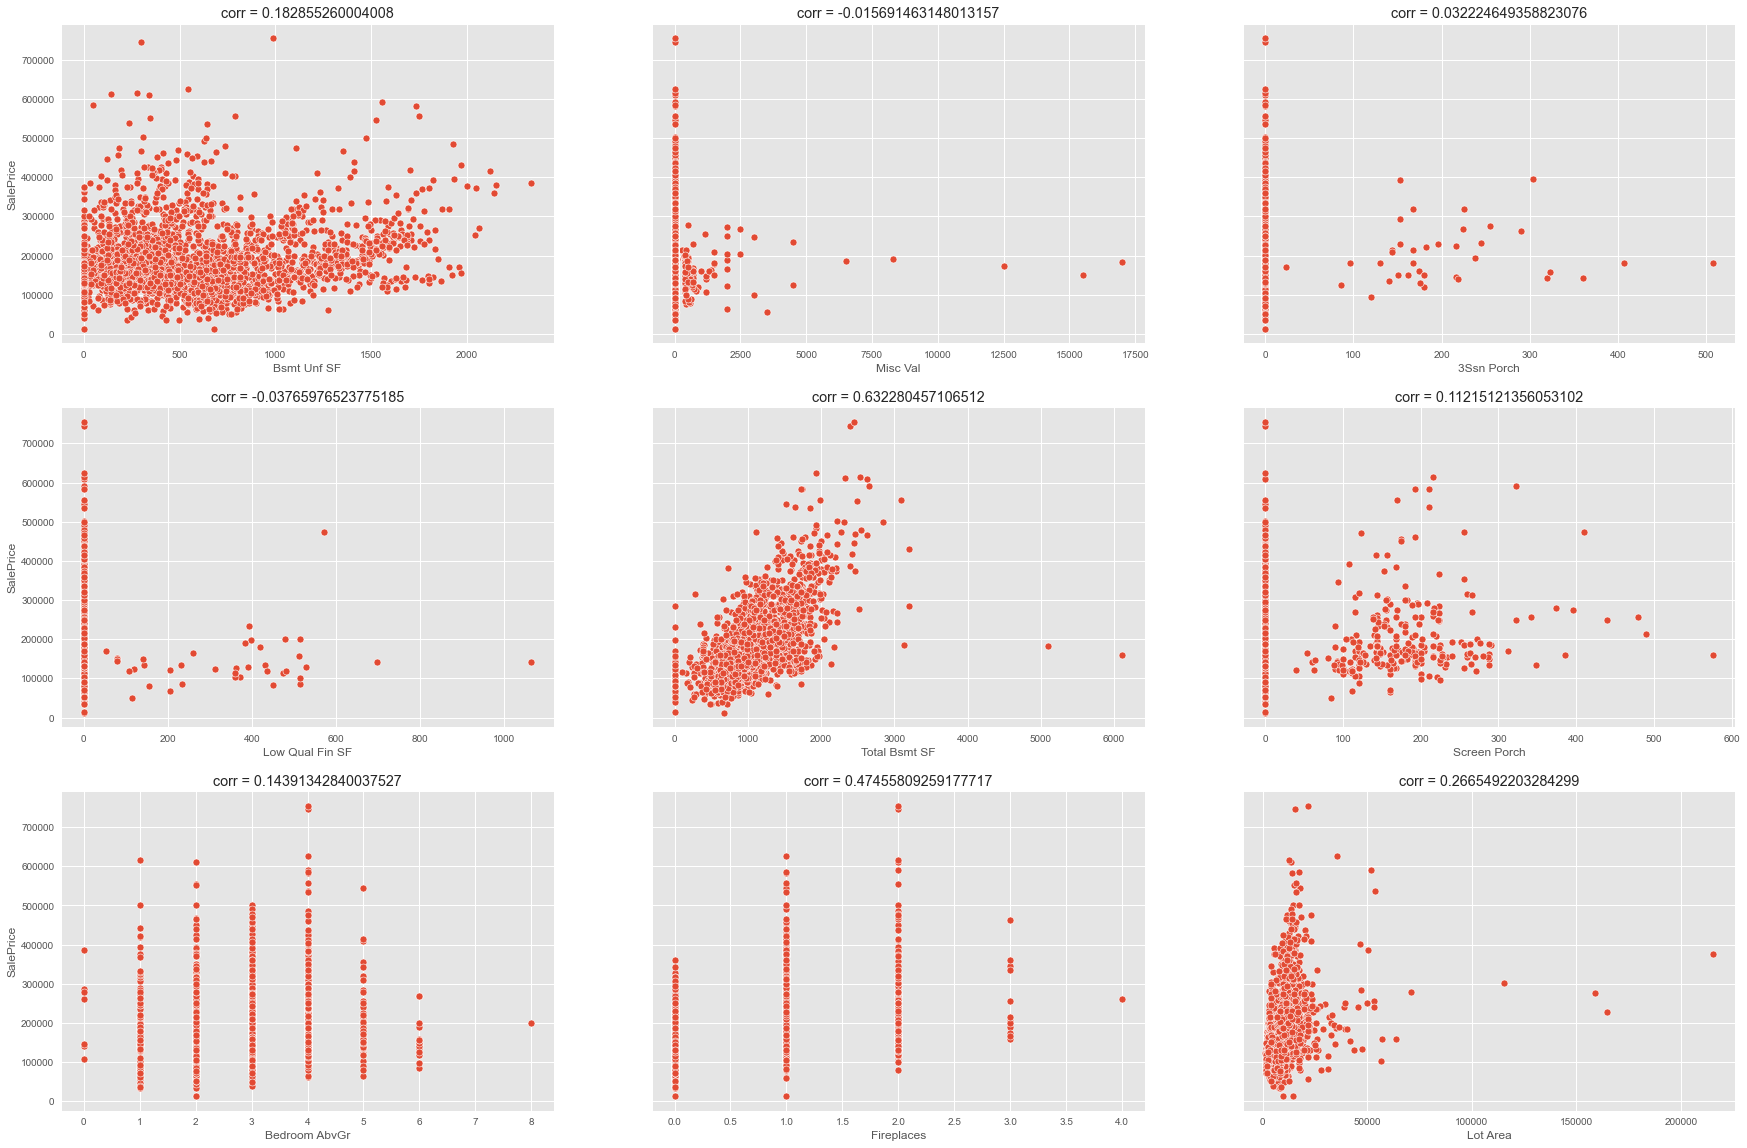

In [26]:
cols = to_plot.columns.to_list()
cols.remove('SalePrice')
fig, axes = plt.subplots(3, 3, figsize=(30,20), sharey=True)
_c = random.sample(cols, 9)
for i, col in enumerate(_c):
    cols.remove(col)
    axes[i//3,i%3].set_title(f'corr = {corr.loc[col, "SalePrice"]}')
    sns.scatterplot(x=col, y="SalePrice", data=to_plot, ax=axes[i//3,i%3])

plt.show()

### Question 1.3
Split data in training and test set. Do not use the test-set unless for a final evaluation in 1.6.
For each categorical variable, cross-validate a Linear Regression model using just this variable
(one-hot-encoded). Visualize the relationship of the categorical variables that provide the best
R^2 value with the target.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import OneHotEncoder

cols = col = _c = to_plot = axes = corr = None
target = df['SalePrice']
df = df.drop(columns=['SalePrice'])

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

In [5]:
categories = x_train.select_dtypes(exclude=['int64', 'float32']).copy()
categories['Order'] = x_train['Order']
categories['PID'] = x_train['PID']
categories['MS SubClass'] = x_train['MS SubClass']
cols = categories.columns.tolist()

In [6]:
encoder = OneHotEncoder()
encoder.fit(categories)
new_cat = encoder.transform(categories).toarray()

In [9]:
start = 0
res = []
N = 0

for col in cols:
    N = len(categories[col].unique())
    res.append(cross_val_score(LinearRegression(), new_cat[:, start:N+start], y_train, cv=3, scoring=('r2')).mean())
    start += N
best_col = cols[np.argmax(res)]

In [11]:
res = new_cat = encoder = categories = None
best_col

'Exter Qual'

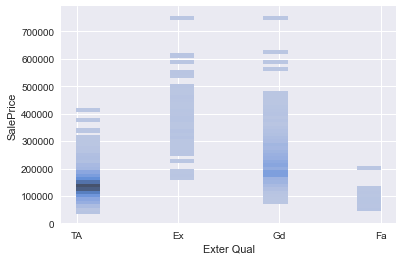

In [17]:
sns.histplot(x=x_train['Exter Qual'], y=y_train, discrete=False, kde=True, stat='density')
plt.show()

### Question 1.4
Use ColumnTransformer and pipeline to encode categorical variables. Evaluate Linear
Regression (OLS), Ridge, Lasso and ElasticNet using cross-validation with the default
parameters. Does scaling the data (within the pipeline) with StandardScaler help?

In [ ]:
# your code here

### Question 1.5
Tune the parameters of the models using GridSearchCV. Do the results improve?
Visualize the dependence of the validation score on the parameters for Ridge, Lasso and
ElasticNet.

In [ ]:
# your code here

### Question 1.6
Visualize the coefficients of the resulting models. Do they agree on which features are
important?

In [ ]:
# your code here

## Task 2 Classification on the Telco-churn dataset (40 points)

You can download the dataset and see it’s description at <br>
https://www.kaggle.com/blastchar/telco-customer-churn

### Question 2.1

Load the data from the file into a DataFrame

In [ ]:
# your code here

### Question 2.2

Split data into training and test set. Build a pipeline for dealing with categorical variables.
Evaluate Logistic Regression and nearest centroids using
cross-validation. How different are the results? How does scaling the continuous features with
StandardScaler influence the results?

In [ ]:
# your code here

### Question 2.3

Tune the parameters using GridSearchCV. Do the results improve?

In [ ]:
# your code here

### Question 2.4

Change the cross-validation strategy from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the
parameters that are found change? Do they change if you change the random seed of the
shuffling? Or if you change the random state of the split into training and test data?

In [ ]:
# your code here

Good Luck!